<a href="https://colab.research.google.com/github/Vande7/Vande7/blob/main/Wk5_Int_M__Ass_Elijah_Vande.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 5 (Week 5)

>**Note**: Late submissions are ***`penalized`***.

## Name: Elijah Vande

<br>

## Please show and display ALL your calculations and results.
> Remember to read the **`instructions`** carefully.

In [2]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Built-in library
import itertools
import typing as tp

# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 1_000


### Download the data [here](https://drive.google.com/file/d/1BhBejDklCoqsqqAcvycA4n7AIpeRnych/view?usp=share_link)

### Problem Statement

**Customer Personality Analysis** is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

### Target
Need to perform **clustering** to summarize customer segments.

### Attributes

```
Attributes

People
------
ID: Customer's unique identifier
Year_Birth: Customer's birth year
Education: Customer's education level
Marital_Status: Customer's marital status
Income: Customer's yearly household income
Kidhome: Number of children in customer's household
Teenhome: Number of teenagers in customer's household
Dt_Customer: Date of customer's enrollment with the company
Recency: Number of days since customer's last purchase
Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Products
--------
MntWines: Amount spent on wine in last 2 years
MntFruits: Amount spent on fruits in last 2 years
MntMeatProducts: Amount spent on meat in last 2 years
MntFishProducts: Amount spent on fish in last 2 years
MntSweetProducts: Amount spent on sweets in last 2 years
MntGoldProds: Amount spent on gold in last 2 years

Promotion
---------
NumDealsPurchases: Number of purchases made with a discount
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place
-----
NumWebPurchases: Number of purchases made through the company’s website
NumCatalogPurchases: Number of purchases made using a catalogue
NumStorePurchases: Number of purchases made directly in stores
NumWebVisitsMonth: Number of visits to company’s website in the last month
```

## Qs 1
* a) Find the average of all the total amount spent on products. Call this variable `Avg_amount`. 
* b) Convert the `Avg_amount` to deciles (0,1,2,...,9) by creating a new variable, `Avg_amount(weights)` such that the higher the Avg_score, the higher the weight.

    * **COMPULSORY**: Validate your resulting by running:

```python
df[["Total_amount", "Avg_amount", "Avg_amount(weights)"]].sample.random(n=5, random_state=2)
```

In [3]:
df = pd.read_csv("/content/marketing_campaign (1).csv",  sep="\t")
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [4]:
df['Total_amount'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)


## 1A Solution

In [5]:
# 1A Solution
df['Avg_amount'] = df['Total_amount'].mean()


## 1B solution

In [6]:
# 1B solution
df['Avg_amount(weights)'] = pd.qcut(df['Avg_amount'], 10, labels=False, duplicates='drop')


In [7]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_amount,Avg_amount,Avg_amount(weights)
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,1617,605.798214,NaN
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,27,605.798214,NaN
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,776,605.798214,NaN
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,53,605.798214,NaN
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,422,605.798214,NaN


## Qs 2. 
* a) Calculate the percentage of the customer's Income spent on purchasing products.
    
    * **COMPULSORY**: Validate your resulting by running:

```python
df[["Income", "Total_amount", "Percentage_income"]].sample.random(n=5, random_state=2)
```

* b) Create a pie chart showing the total amount spent by the customers grouped by their `Marital_status`
    Note: Any customer that is not ***single***, ***together***, ***married*** or ***divorced*** should be considered as **others**.

## 2A Solution

In [34]:
# Question 2A Solution

# Calculate the percentage of income spent on products
df['Percentage_income'] = (df['Total_amount'] / df['Income']) * 100



In [10]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Total_amount', 'Avg_amount', 'Avg_amount(weights)',
       'Percentage_income'],
      dtype='object')

In [11]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_amount,Avg_amount,Avg_amount(weights),Percentage_income
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,1617,605.798214,NaN,2.781313
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,27,605.798214,NaN,0.058260
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,776,605.798214,NaN,1.083602
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,53,605.798214,NaN,0.198904
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,422,605.798214,NaN,0.723929


## 2B solution

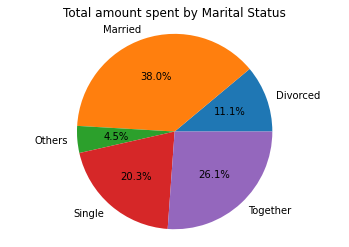

In [12]:
# group by marital status
df_grouped = df.groupby(['Marital_Status']).sum()

# reset index to avoid ambiguity
df_grouped = df_grouped.reset_index()

# combine other marital status into one group
df_grouped.loc[~df_grouped['Marital_Status'].isin(['Single', 'Together', 'Married', 'Divorced']), 'Marital_Status'] = 'Others'
df_grouped = df_grouped.groupby(['Marital_Status']).sum()

# create the pie chart
plt.pie(df_grouped['MntWines'], labels=df_grouped.index, autopct='%1.1f%%')
plt.title('Total amount spent by Marital Status')
plt.axis('equal')
plt.show()




## Qs 3.  
* a) Create a new variable called `Recency(weights)` which is obtained by dividing the `Recency` variable into quintiles (0,1,2,3,4) such that customers lower Recency values have higher weights. i.e the smaller the recency value, the greater the `Recency(weights)`.

    * **COMPULSORY**: Validate your resulting by running:

```python
df[["Recency", "Recency(weights)"]].sample.random(n=5, random_state=2)
```

* b) What is the percentage of customers that accepted at least an offer after the end of the promotion campaign?

## 3A solution

In [13]:
# 3A Solution

# calculate quintiles of Recency variable
df['Recency(quintiles)'] = pd.qcut(df['Recency'], q=5, labels=False)

# create Recency(weights) variable
df['Recency(weights)'] = 5 - df['Recency(quintiles)']

# show the updated dataframe
df.head(1)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_amount,Avg_amount,Avg_amount(weights),Percentage_income,Recency(quintiles),Recency(weights)
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,1617,605.798214,NaN,2.781313,2,3


## 3B solution

In [14]:
# 3B solution

# calculate the percentage of customers that accepted at least one offer
response_count = df['Response'].sum()
total_customers = df.shape[0]
acceptance_rate = response_count / total_customers * 100

# print the percentage
print(f"The percentage of customers that accepted at least one offer is {acceptance_rate:.2f}%")



The percentage of customers that accepted at least one offer is 14.91%


## Qs 4.  
* a) Calculate the frequency of the purchases. (Do this by finding the total number of purchases made by every customer)
* b) Create a new variable, `Frequency(weights)` by converting the result from the previous question to quartiles (0,1,2,3) such that the higher the `Frequency`, the higher the weight.

    * **COMPULSORY**: Validate your resulting by running:

```python
df[["Frequency", "Frequency(weights)"]].sample.random(n=5, random_state=2)
```

## 4A solution

In [15]:
# 4A Solutuion
# create a new column for the total number of purchases made by each customer
df['TotalPurchases'] = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

# calculate the frequency of purchases
freq_purchases = df.groupby('TotalPurchases').size().reset_index(name='Frequency')

# print the results
freq_purchases.head()


,TotalPurchases,Frequency
0,0,4
1,1,4
2,2,3
3,4,128
4,5,145


## 4B solution

In [16]:
# 4B Solution

# create a new column for the quartile of the frequency of purchases
freq_purchases['Frequency(weights)'] = pd.qcut(freq_purchases['Frequency'], q=4, labels=[0, 1, 2, 3])

# merge the frequency(weights) column with the original dataframe
df = pd.merge(df, freq_purchases[['TotalPurchases', 'Frequency(weights)']], on='TotalPurchases', how='left')

# print the resulting dataframe
print(df[['TotalPurchases', 'Frequency(weights)']].head())


   TotalPurchases Frequency(weights)
0              25                  2
1               6                  3
2              21                  3
3               8                  2
4              19                  3


## Qs 5.  
* a) Calculate the `Customer Personality Analysis` using **RFM** (Recency Frequency Monetary) value using the formula:
`Recency(weights)` + `Frequency(weights)` + `Avg_amount(weights)`. 
* b) Create a new variable called `Customer_value` by segmenting the customers using the RFM value. The RFM value should be converted into tercile (3 groups). Customer_value should have the following labels: `high_value`, `medium_value` and `low_value` which represents the binned RFM values.

    * **COMPULSORY**: Validate your resulting by running:
```python
df[["Recency(weights)", "Frequency(weights)", "Avg_amount(weights)", "RFM", "Customer_value"]].sample.random(n=10, random_state=2)
```

In [17]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Total_amount', 'Avg_amount', 'Avg_amount(weights)',
       'Percentage_income', 'Recency(quintiles)', 'Recency(weights)',
       'TotalPurchases', 'Frequency(weights)'],
      dtype='object')

## 5A solution

In [18]:
# 5A solution

# Calculate quantiles for each category
recency_quantiles = df['Recency'].quantile(q=[0.25, 0.5, 0.75])
frequency_quantiles = df['Frequency(weights)'].quantile(q=[0.25, 0.5, 0.75])
avg_amount_quantiles = df['Avg_amount'].quantile(q=[0.25, 0.5, 0.75])

# Assign weights based on quantile performance
def assign_weight(x, quantiles):
    if x <= quantiles[0.25]:
        return 1
    elif x <= quantiles[0.5]:
        return 2
    elif x <= quantiles[0.75]:
        return 3
    else:
        return 4
    
df['Recency_weight'] = df['Recency'].apply(assign_weight, args=(recency_quantiles,))
df['Frequency_weight'] = df['Frequency(weights)'].apply(assign_weight, args=(frequency_quantiles,))
df['Avg_amount_weight'] = df['Avg_amount'].apply(assign_weight, args=(avg_amount_quantiles,))

# Calculate RFM value
df['RFM'] = df['Recency_weight'] + df['Frequency_weight'] + df['Avg_amount_weight']

# Analyze results
df.groupby('RFM')['ID'].count()



RFM
3    281
4    291
5    590
6    568
7    263
8    247
Name: ID, dtype: int64

In [19]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_amount,Avg_amount,Avg_amount(weights),Percentage_income,Recency(quintiles),Recency(weights),TotalPurchases,Frequency(weights),Recency_weight,Frequency_weight,Avg_amount_weight,RFM
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,1617,605.798214,NaN,2.781313,2,3,25,2,3,1,1,5
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,27,605.798214,NaN,0.058260,1,4,6,3,2,3,1,6
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,776,605.798214,NaN,1.083602,1,4,21,3,2,3,1,6
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,53,605.798214,NaN,0.198904,1,4,8,2,2,1,1,4
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,422,605.798214,NaN,0.723929,4,1,19,3,4,3,1,8


In [30]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Total_amount', 'Avg_amount', 'Avg_amount(weights)',
       'Percentage_income', 'Recency(quintiles)', 'Recency(weights)',
       'TotalPurchases', 'Frequency(weights)', 'Recency_weight',
       'Frequency_weight', 'Avg_amount_weight', 'RFM'],
      dtype='object')

In [27]:
print(df['RFM'].dtype)

int64


## 5B solution 

In [31]:
# 5B Solution
# assuming that you have calculated the RFM values and stored them in a column called 'RFM'
df['Customer_value'] = pd.cut(df['RFM'], bins=3, labels=['low_value', 'medium_value', 'high_value'])

# display the first 5 rows of the 'Customer_value' column
print(df['Customer_value'].head())



0    medium_value
1    medium_value
2    medium_value
3       low_value
4      high_value
Name: Customer_value, dtype: category
Categories (3, object): ['low_value' < 'medium_value' < 'high_value']


In [32]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Total_amount', 'Avg_amount', 'Avg_amount(weights)',
       'Percentage_income', 'Recency(quintiles)', 'Recency(weights)',
       'TotalPurchases', 'Frequency(weights)', 'Recency_weight',
       'Frequency_weight', 'Avg_amount_weight', 'RFM', 'Customer_value'],
      dtype='object')

In [33]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_amount,Avg_amount,Avg_amount(weights),Percentage_income,Recency(quintiles),Recency(weights),TotalPurchases,Frequency(weights),Recency_weight,Frequency_weight,Avg_amount_weight,RFM,Customer_value
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,1617,605.798214,NaN,2.781313,2,3,25,2,3,1,1,5,medium_value
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,27,605.798214,NaN,0.058260,1,4,6,3,2,3,1,6,medium_value
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,776,605.798214,NaN,1.083602,1,4,21,3,2,3,1,6,medium_value
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,53,605.798214,NaN,0.198904,1,4,8,2,2,1,1,4,low_value
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,422,605.798214,NaN,0.723929,4,1,19,3,4,3,1,8,high_value
